In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel(r"/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print(df.shape)
df.drop_duplicates(inplace=True)
df.shape

(541909, 8)


(536641, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [ ]:
df= df.loc[df['Quantity']>0,:]
df.shape

(526054, 8)

In [ ]:
df.reset_index(drop=True, inplace =True)

In [ ]:
invoices = df['InvoiceNo']
x = invoices.str.contains('C', regex=True)
print(x)
x.fillna(0,inplace=True)
print(x)
x= x.astype(int)
print(x)
x.value_counts()

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
526049    NaN
526050    NaN
526051    NaN
526052    NaN
526053    NaN
Name: InvoiceNo, Length: 526054, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
526049    0
526050    0
526051    0
526052    0
526053    0
Name: InvoiceNo, Length: 526054, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
526049    0
526050    0
526051    0
526052    0
526053    0
Name: InvoiceNo, Length: 526054, dtype: int64


0    526054
Name: InvoiceNo, dtype: int64

In [ ]:
df['order_canceled'] = x
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
df.loc[df['order_canceled']==0,:]
df.loc[df['Quantity']<0,:]
df = df[df['CustomerID'].notna()]
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


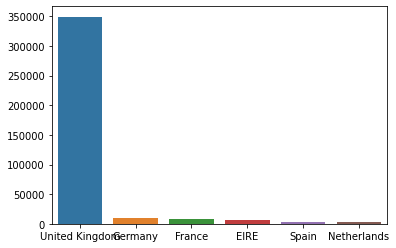

In [ ]:
temp1 = df['Country'].value_counts()
temp2 = temp1[0:6]
sns.barplot(temp2.index,temp2.values)
plt.show()

In [ ]:
df = df[df['Country']=='United Kingdom']

In [ ]:
df.reset_index(drop = True,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349227 entries, 0 to 349226
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       349227 non-null  object        
 1   StockCode       349227 non-null  object        
 2   Description     349227 non-null  object        
 3   Quantity        349227 non-null  int64         
 4   InvoiceDate     349227 non-null  datetime64[ns]
 5   UnitPrice       349227 non-null  float64       
 6   CustomerID      349227 non-null  float64       
 7   Country         349227 non-null  object        
 8   order_canceled  349227 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 24.0+ MB


In [ ]:
pd.DataFrame([{'Products':len(df['StockCode'].value_counts()),
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts())}],columns =['Products', 'transactions','customers'],index =['total_quantity'])

,Products,transactions,customers
total_quantity,3645,16649,3921


**Cohort Analysis**  (Time,Behaviour, Size cohorts) here-> time cohorts

In [ ]:
df_cohort = df.drop(columns='order_canceled',axis=1)
df_cohort.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
all_dates = (pd.to_datetime(df_cohort['InvoiceDate'])).apply(lambda x:x.date())
print(all_dates.min())
print(all_dates.max())

2010-12-01
2011-12-09


In [ ]:
def get_month(x):
  return dt.datetime(x.year, x.month,1)

In [ ]:
df_cohort['Invoice_Month'] = df_cohort['InvoiceDate'].apply(get_month)
print(df_cohort.head())
grouping = df_cohort.groupby('CustomerID')['Invoice_Month']
df_cohort['Cohort_Month'] = grouping.transform('min')
print(df_cohort.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Invoice_Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    2010-12-01  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12-01  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    2010-12-01  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12-01  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    2010-12-01  
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HAN

In [ ]:
def get_date_int(df,column):
     return df[column].dt.year, df[column].dt.month
invoice_year,invoice_month = get_date_int(df_cohort,'Invoice_Month')
cohort_year, cohort_month = get_date_int(df_cohort,'Cohort_Month')     
year_diff = invoice_year- cohort_year
month_diff = invoice_month-cohort_month
df_cohort['Cohort_Index'] = year_diff*12 + month_diff
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,Cohort_Month,Cohort_Index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0


In [ ]:
grouping = df_cohort.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Cohort_Month',columns='Cohort_Index',values='CustomerID')
cohort_counts

Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12-01,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02-01,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,169.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,141.0,32.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention

Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12-01,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
2011-01-01,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
2011-02-01,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
2011-03-01,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
2011-04-01,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.187500,0.171875,0.171875,0.207031,0.226562,0.265625,0.089844,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.177570,0.144860,0.238318,0.238318,0.322430,0.098131,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.177515,0.195266,0.230769,0.278107,0.106509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.226950,0.226950,0.241135,0.120567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouping = df_cohort.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data1 = grouping['Quantity'].mean()
cohort_data1 = cohort_data1.reset_index()
average_quantity = cohort_data1.pivot(index='Cohort_Month',columns='Cohort_Index',values='Quantity')
average_quantity.round(1)
average_quantity

Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12-01,11.363528,12.863370,13.931012,13.872916,13.343757,13.287995,14.274862,13.773035,16.144706,16.123957,16.672496,12.446232,14.462301
2011-01-01,18.080062,9.628663,9.442006,15.098384,10.089666,10.894436,13.554896,10.814691,10.757836,8.695507,8.592414,10.022152,NaN
2011-02-01,10.997248,14.049922,15.948747,12.122111,12.320763,11.928197,13.872105,13.721955,10.996767,12.542671,13.819477,NaN,NaN
2011-03-01,9.695935,11.430435,13.305280,10.086977,13.532950,12.837738,13.107456,14.062043,11.199703,9.734098,NaN,NaN,NaN
2011-04-01,10.068291,10.156757,9.720736,11.940795,11.863813,8.262323,9.873959,9.363861,7.477707,NaN,NaN,NaN,NaN
2011-05-01,10.657960,9.392857,14.841623,12.800244,11.045652,8.307816,10.816216,126.911243,NaN,NaN,NaN,NaN,NaN
2011-06-01,9.549744,14.785714,11.980276,12.738017,9.818008,8.891049,9.350254,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.145833,14.984576,6.572790,8.112313,5.778264,6.683406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.393834,6.029240,5.028132,5.909297,6.558894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


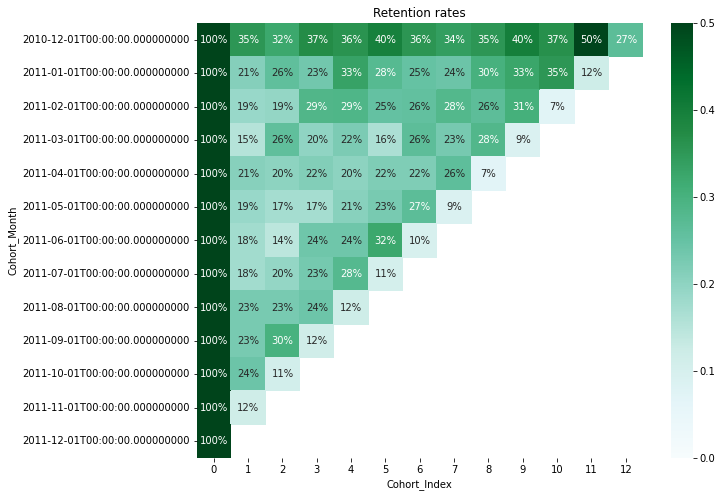

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

**RFM** (Recency, Frequency, and Monetary)

count    349227.000000
mean         20.860428
std         328.406035
min           0.000000
25%           4.200000
50%          10.200000
75%          17.850000
max      168469.600000
Name: Total_Sum, dtype: float64

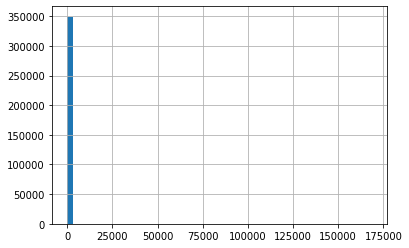

In [ ]:
df_cohort['Total_Sum'] = df['Quantity']* df['UnitPrice']
df_cohort.Total_Sum.hist(bins=50)
df_cohort['Total_Sum'].describe()

In [ ]:
df_cohort[df_cohort['Total_Sum']> 17.850000].sort_values('Total_Sum',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,Cohort_Month,Cohort_Index,Total_Sum
348876,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011-12-01,2011-05-01,7,168469.60
32817,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,2011-01-01,0,77183.60
136794,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,2011-06-01,2011-06-01,0,38970.00
104335,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011-05-01,2010-12-01,5,8142.75
217501,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,2011-09-01,2010-12-01,9,7144.72
...,...,...,...,...,...,...,...,...,...,...,...,...
58214,545081,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-02-28 10:35:00,1.49,16057.0,United Kingdom,2011-02-01,2011-02-01,0,17.88
79230,547921,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-03-28 13:28:00,1.49,14766.0,United Kingdom,2011-03-01,2010-12-01,3,17.88
58403,545150,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-02-28 12:27:00,1.49,14227.0,United Kingdom,2011-02-01,2011-02-01,0,17.88
28684,540691,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,12,2011-01-11 08:50:00,1.49,17450.0,United Kingdom,2011-01-01,2010-12-01,1,17.88


In [ ]:
from dateutil.relativedelta import relativedelta  
#Let us check the max date and take data till a year behind the max date.
start_date = all_dates.max()-relativedelta(months=12,days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-10
End date: 2011-12-09


In [ ]:
data_rfm = df_cohort[df_cohort['InvoiceDate'] >= pd.to_datetime(start_date)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Month,Cohort_Month,Cohort_Index,Total_Sum
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10 09:33:00,1.25,15805.0,United Kingdom,2010-12-01,2010-12-01,0,15.0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10 09:33:00,4.95,15805.0,United Kingdom,2010-12-01,2010-12-01,0,39.6
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10 09:33:00,2.55,15805.0,United Kingdom,2010-12-01,2010-12-01,0,30.6
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10 09:33:00,2.95,15805.0,United Kingdom,2010-12-01,2010-12-01,0,35.4
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10 09:33:00,0.55,15805.0,United Kingdom,2010-12-01,2010-12-01,0,13.2


In [ ]:
snapshot_date = max(data_rfm.InvoiceDate) + dt.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))

Snapshot date: 2011-12-10


In [ ]:
# Aggregate data on a customer level
data = data_rfm.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                             'InvoiceNo': 'count',
                                             'Total_Sum': 'sum'}).rename(columns = {'InvoiceDate': 'Recency',
                                                                                   'InvoiceNo': 'Frequency',
                                                                                   'Total_Sum': 'MonetaryValue'})

data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12747.0,2,96,3837.45
2,12748.0,1,4055,31081.74
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(data['Recency'], 4, labels = r_labels)
data = data.assign(R = r_quartiles.values)

f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(data['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(data['MonetaryValue'], 4, labels = m_labels)
data = data.assign(F = f_quartiles.values)
data = data.assign(M = m_quartiles.values)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12747.0,2,96,3837.45,4,3,4
2,12748.0,1,4055,31081.74,4,4,4
3,12749.0,4,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [ ]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

data['RFM_Segment'] = data.apply(join_rfm, axis=1)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
1,12747.0,2,96,3837.45,4,3,4,4.03.04.0,11
2,12748.0,1,4055,31081.74,4,4,4,4.04.04.0,12
3,12749.0,4,199,4090.88,4,4,4,4.04.04.0,12
4,12820.0,3,59,942.34,4,3,3,4.03.03.0,10


In [ ]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           242.6       7.9         149.8   324
4           171.0      13.7         224.3   353
5           147.6      20.0         351.1   456
6            87.4      27.0         807.3   432
7            80.8      38.9         717.1   399
8            56.3      52.0         930.3   397
9            43.8      73.5        1757.9   373
10           32.0     110.4        1869.3   389
11           20.6     183.7        3405.9   334
12            6.9     351.9        8027.9   398

In [ ]:
def create_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
data['General_Segment'] = data.apply(create_segment, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               205.3      10.9         188.7   677
Middle             94.8      33.8         691.4  1684
Top                25.7     181.9        3825.7  1494

**Preprocessing data for Clustering**
In the next section, we are going to prepare the data for Kmeans clustering on RFM Score data. To do this, we need to preprocess the data so that it can meet the key assumptions of Kmeans algorithm, which are:

The varaiables should be distributed symmetrically

Variables should have similar average values

Variables should have similar standard deviation values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

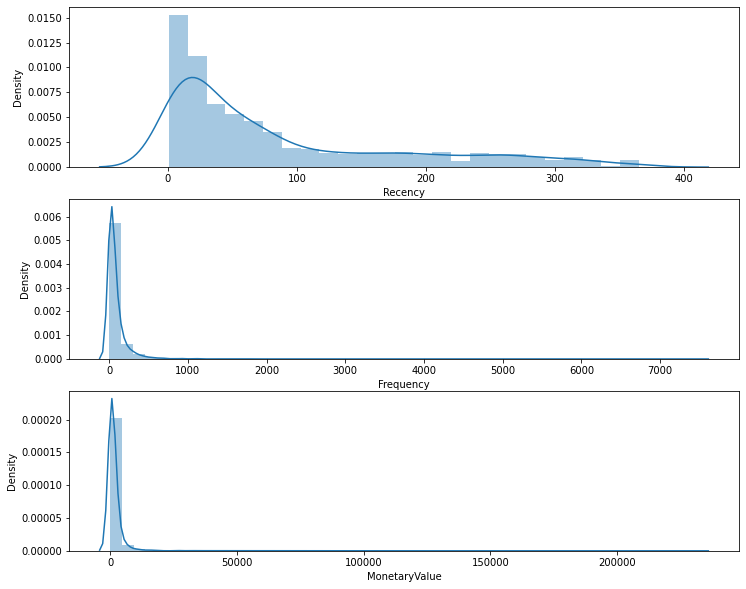

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

In [ ]:
# Checking for constant mean and variance.
data[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,3855.000000,3855.000000,3855.000000
mean,87.428016,87.205966,1817.792603
std,93.428162,209.411865,7190.041841
min,1.000000,1.000000,0.000000
25%,17.000000,16.000000,291.680000
50%,50.000000,40.000000,638.060000
75%,134.000000,96.000000,1545.515000
max,365.000000,7491.000000,231822.690000


In [ ]:
data = data[data['MonetaryValue'] > 0]
data.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
raw_data = data[['Recency','Frequency','MonetaryValue']]
data_log = np.log(raw_data)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)
data_norm.head()

,Recency,Frequency,MonetaryValue
0,5.786897,0.000000,11.253942
1,0.693147,4.564348,8.252563
2,0.000000,8.307706,10.344376
3,1.386294,5.293305,8.316515
4,1.098612,4.077537,6.848366


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

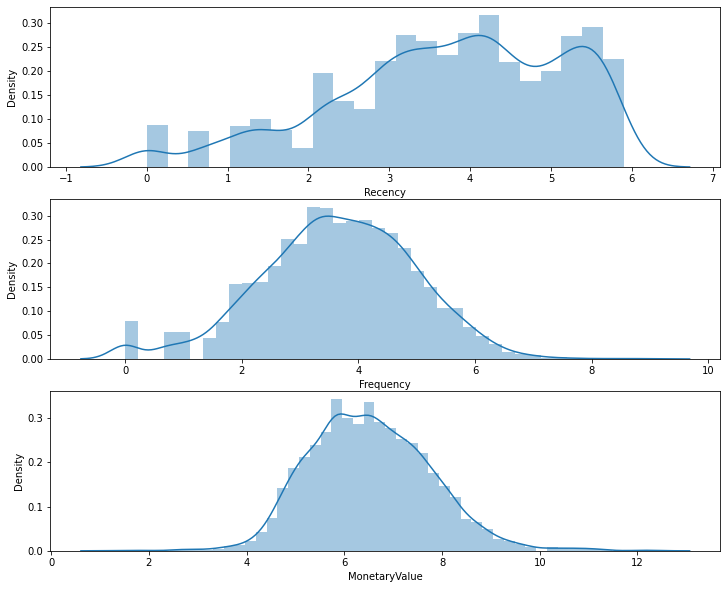

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])
plt.show()

**Clustering with K-means algorithm**

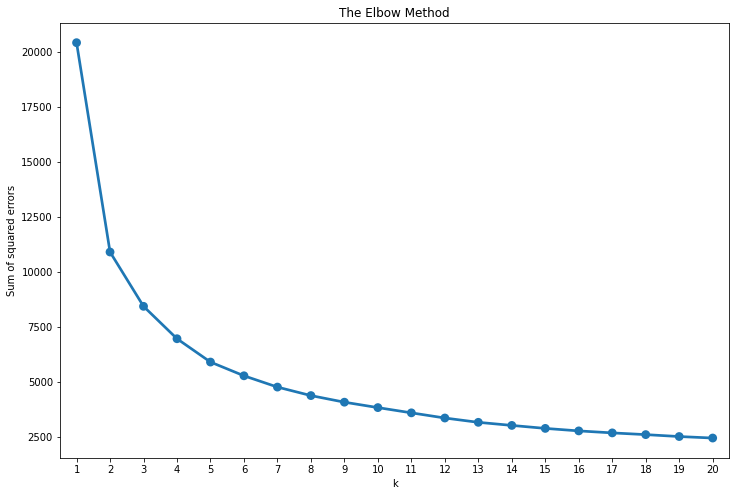

In [ ]:
from sklearn.cluster import KMeans
sse ={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_norm)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [ ]:
# Create a cluster label column in the original DataFrame
data_norm_k3 = data_norm.assign(Cluster = cluster_labels)
data_k3 = raw_data.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          67.0      67.0        1182.0  1636
1         161.0      14.0         284.0  1357
2          11.0     240.0        5445.0   861

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_
# Create a cluster label column in the original DataFrame
data_norm_k4 = data_norm.assign(Cluster = cluster_labels)
data_k4 = raw_data.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          85.0      85.0        1551.0  1147
1         178.0      15.0         293.0  1216
2          10.0     269.0        6197.0   721
3          21.0      34.0         525.0   770

**Profiling and interpreting segments**

In [ ]:
display(summary_k3)
display(summary_k4)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          67.0      67.0        1182.0  1636
1         161.0      14.0         284.0  1357
2          11.0     240.0        5445.0   861

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          85.0      85.0        1551.0  1147
1         178.0      15.0         293.0  1216
2          10.0     269.0        6197.0   721
3          21.0      34.0         525.0   770

In [ ]:
data_norm_k4.index = data['CustomerID'].astype(int)
data_norm_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,5.786897,0.000000,11.253942,0
12747,0.693147,4.564348,8.252563,2
12748,0.000000,8.307706,10.344376,2
12749,1.386294,5.293305,8.316515,2
12820,1.098612,4.077537,6.848366,2


In [ ]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(data_norm_k4.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')

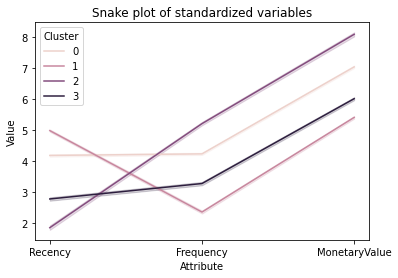

In [ ]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)

In [ ]:
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,0
12747,2,96,3837.45,2
12748,1,4055,31081.74,2
12749,4,199,4090.88,2
12820,3,59,942.34,2


In [ ]:
raw_data.index = data['CustomerID'].astype(int)
raw_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12747,2,96,3837.45
12748,1,4055,31081.74
12749,4,199,4090.88
12820,3,59,942.34


In [ ]:
cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = raw_data.head().mean()

In [ ]:
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,84.549259,85.401046,1550.655024
1,178.092928,14.846217,293.134425
2,9.758669,268.549237,6196.815354
3,21.358442,34.475325,525.498494


In [ ]:
population_avg

Recency             67.200
Frequency          882.000
MonetaryValue    23427.202
dtype: float64

In [ ]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.26,-0.90,-0.93
1,1.65,-0.98,-0.99
2,-0.85,-0.70,-0.74
3,-0.68,-0.96,-0.98


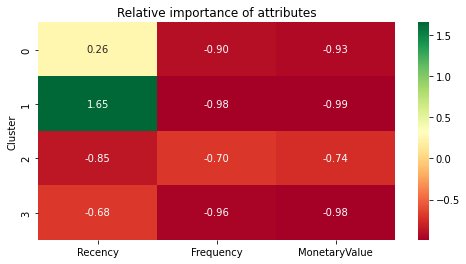

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()